# Import modules

In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

### Support function

In [350]:
# Reformat the date from y.d.m to m/y
def reformat_date(video_list, feature_date="trending_date"):
    """
    Reformat the date from y.d.m to d/m/Y for easy reading.

    Args:
        video_list (ndarray): The list of videos from one country.
        feature_date (str): The name of the feature column containing the date (default: 'trending_date').

    Returns:
        video_list (ndarray): The list of videos from one country after reformatting.
    """
    video_list[feature_date] = pd.to_datetime(
        video_list[feature_date], format="%y.%d.%m"
    )
    video_list[feature_date] = video_list[feature_date].dt.strftime("%d/%m/%Y")

    return video_list


# Count the unique records in feature
def count_unique_records(video_list, feature_name):
    """
    Count the unique records in a feature.

    Args:
        video_list (ndarray): The list of videos from one country.
        feature_name (str): The name of the feature column in which to count unique records.

    Returns:
        df (DataFrame): The data frame of each unique record and its count.
    """
    counts = video_list[feature_name].value_counts()

    df = pd.DataFrame(
        {
            f"{feature_name}": counts.index.tolist(),
            f"count_{feature_name}": counts.values.tolist(),
        }
    )

    df.sort_values(by=[f"count_{feature_name}"], ascending=True)

    return df


# Mapping the category_id to its meaning
def mapping_the_categoryID(video_list, category_list):
    """
    Map category IDs to their corresponding meanings.

    Args:
        video_list (ndarray): A list of videos from one country.
        category_list (dict): A dictionary mapping category IDs to their meanings for videos from one country.

    Returns:
        df (DataFrame): A DataFrame after mapping.
    """
    category_id_dictionary = {}
    for item in category_list["items"]:
        category_id_dictionary[f"{item['id']}"] = item["snippet"]["title"]

    video_list["category_id"] = (
        video_list["category_id"].astype(str).map(category_id_dictionary)
    )

    video_list.rename(columns={"category_id": "category_name"}, inplace=True)

### Cleaning the data

In [351]:
# Take the Canada Videos as the example
caVideo = pd.read_csv("./youtube_data/CAvideos.csv", encoding="ISO-8859-1")
mxVideo = pd.read_csv("./youtube_data/MXvideos.csv", encoding="ISO-8859-1")
usVideo = pd.read_csv("./youtube_data/USvideos.csv", encoding="ISO-8859-1")
CategoryID_path = "./youtube_data/US_category_id.json"

with open(CategoryID_path, "r") as file:
    CategoryID = json.load(file)

for country_video in [caVideo, mxVideo, usVideo]:
    reformat_date(country_video)
    mapping_the_categoryID(country_video, CategoryID)

caVideo.head(3)

,video_id,trending_date,title,channel_title,category_name,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,14/11/2017,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,14/11/2017,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,14/11/2017,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...


### Exploring the data

In [352]:
caVideo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_name           40881 non-null  object
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [353]:
mxVideo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40451 non-null  object
 1   trending_date           40451 non-null  object
 2   title                   40451 non-null  object
 3   channel_title           40451 non-null  object
 4   category_name           40451 non-null  object
 5   publish_time            40451 non-null  object
 6   tags                    40451 non-null  object
 7   views                   40451 non-null  int64 
 8   likes                   40451 non-null  int64 
 9   dislikes                40451 non-null  int64 
 10  comment_count           40451 non-null  int64 
 11  thumbnail_link          40451 non-null  object
 12  comments_disabled       40451 non-null  bool  
 13  ratings_disabled        40451 non-null  bool  
 14  video_error_or_removed  40451 non-null  bool  
 15  de

In [354]:
usVideo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_name           40949 non-null  object
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

### ***Question 1: How many trending videos are there in the dataset each year? (Canada, Mexico and United State)***

### Function

In [355]:
def count_trending_videos_per_year(data):
    # Change the object to datetime with a specific format
    data["trending_date"] = pd.to_datetime(data["trending_date"], format="%d/%m/%Y")

    # Group videos by trending_date's year
    data_per_year = data.groupby(data["trending_date"].dt.year)

    # Get the count of unique videos per year (based on 'video_id')
    data_unique_videos_per_year = data_per_year["video_id"].nunique()

    data_unique_videos_per_year = data_unique_videos_per_year.reset_index().rename(
        columns={"trending_date": "year", "video_id": "number of videos"}
    )

    return data_unique_videos_per_year

### Canada dataset

In [356]:
ca_result = count_trending_videos_per_year(caVideo)

ca_result

,year,number of videos
0,2017,5477
1,2018,19043


### Mexico dataset

In [357]:
mx_result = count_trending_videos_per_year(mxVideo)

mx_result

,year,number of videos
0,2017,7938
1,2018,25607


### US dataset

In [358]:
us_result = count_trending_videos_per_year(usVideo)

us_result

,year,number of videos
0,2017,2119
1,2018,4427


### Visualize

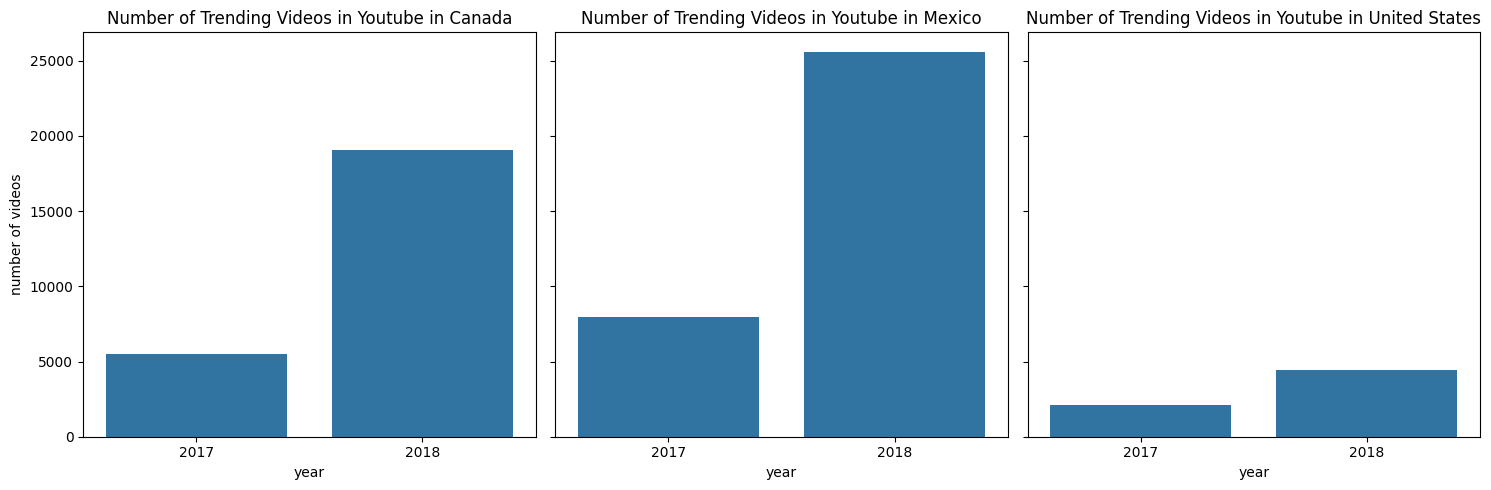

In [359]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for Canada
sns.barplot(data=ca_result, x="year", y="number of videos", ax=axes[0]).set(
    title="Number of Trending Videos in Youtube in Canada"
)

# Plot for Mexico
sns.barplot(data=mx_result, x="year", y="number of videos", ax=axes[1]).set(
    title="Number of Trending Videos in Youtube in Mexico"
)

# Plot for United States
sns.barplot(data=us_result, x="year", y="number of videos", ax=axes[2]).set(
    title="Number of Trending Videos in Youtube in United States"
)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### ***Question 2: How the distribution of views in each country?***

In [442]:
ca_no_duplicate_keep_last_result = caVideo.drop_duplicates(
    subset="video_id", keep="last"
)

mx_no_duplicate_keep_last_result = mxVideo.drop_duplicates(
    subset="video_id", keep="last"
)

us_no_duplicate_keep_last_result = usVideo.drop_duplicates(
    subset="video_id", keep="last"
)

<Figure size 1200x600 with 0 Axes>

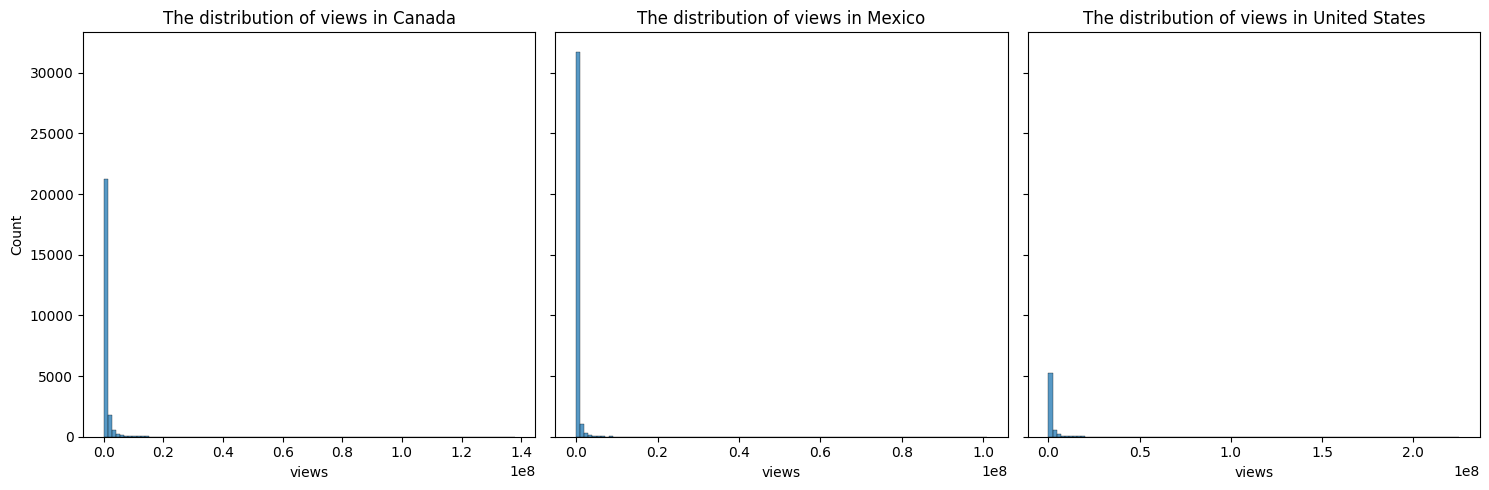

In [436]:
plt.figure(figsize=(12, 6))
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
bins = 100

# Plot for Canada
sns.histplot(
    data=ca_no_duplicate_keep_last_result, x="views", bins=bins, ax=axes[0]
).set(title="The distribution of views in Canada")

# Plot for Mexico
sns.histplot(
    data=mx_no_duplicate_keep_last_result, x="views", bins=bins, ax=axes[1]
).set(title="The distribution of views in Mexico")

# Plot for United States
sns.histplot(
    data=us_no_duplicate_keep_last_result, x="views", bins=bins, ax=axes[2]
).set(title="The distribution of views in United States")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [438]:
# Total views in Canada dataset
ca_total_views = ca_no_duplicate_keep_last_result["views"].sum()

# Total views in Mexico dataset
mx_total_views = mx_no_duplicate_keep_last_result["views"].sum()

# Total views in United States dataset
us_total_views = us_no_duplicate_keep_last_result["views"].sum()

# Create a DataFrame with the total views for each country
total_views_df = pd.DataFrame(
    {
        "Country": ["Canada", "Mexico", "United States"],
        "Total Views": [ca_total_views, mx_total_views, us_total_views],
    }
)

# Display the result
total_views_df

,Country,Total Views
0,Canada,20410495101
1,Mexico,9302980511
2,United States,12461406596


[Text(0.5, 1.0, "Total views in each country's dataset")]

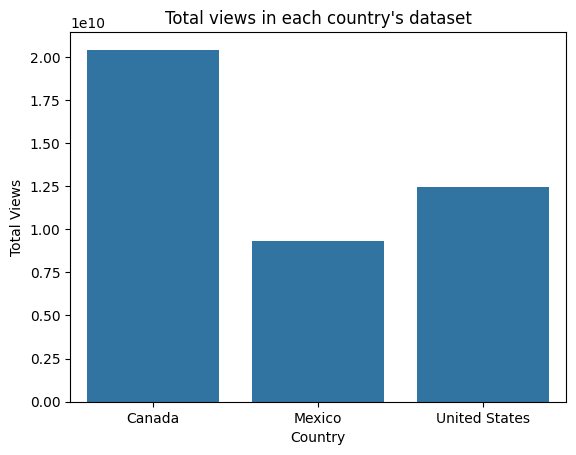

In [439]:
sns.barplot(data=total_views_df, x="Country", y="Total Views").set(
    title="Total views in each country's dataset"
)

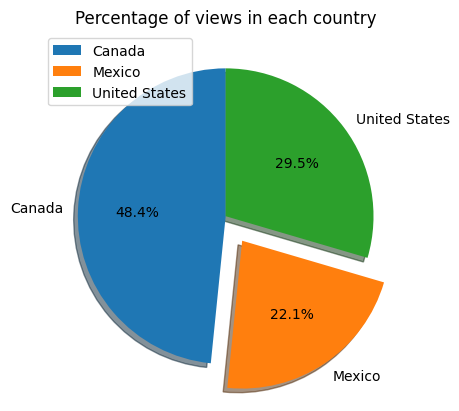

In [440]:
plt.pie(
    total_views_df["Total Views"],
    labels=total_views_df["Country"],
    autopct="%1.1f%%",
    explode=(0, 0.2, 0),
    shadow=True,
    startangle=90,
)

plt.title("Percentage of views in each country")
plt.legend()
plt.show()

### ***Question 3: How the distribution of likes in each country?***

<Figure size 1200x600 with 0 Axes>

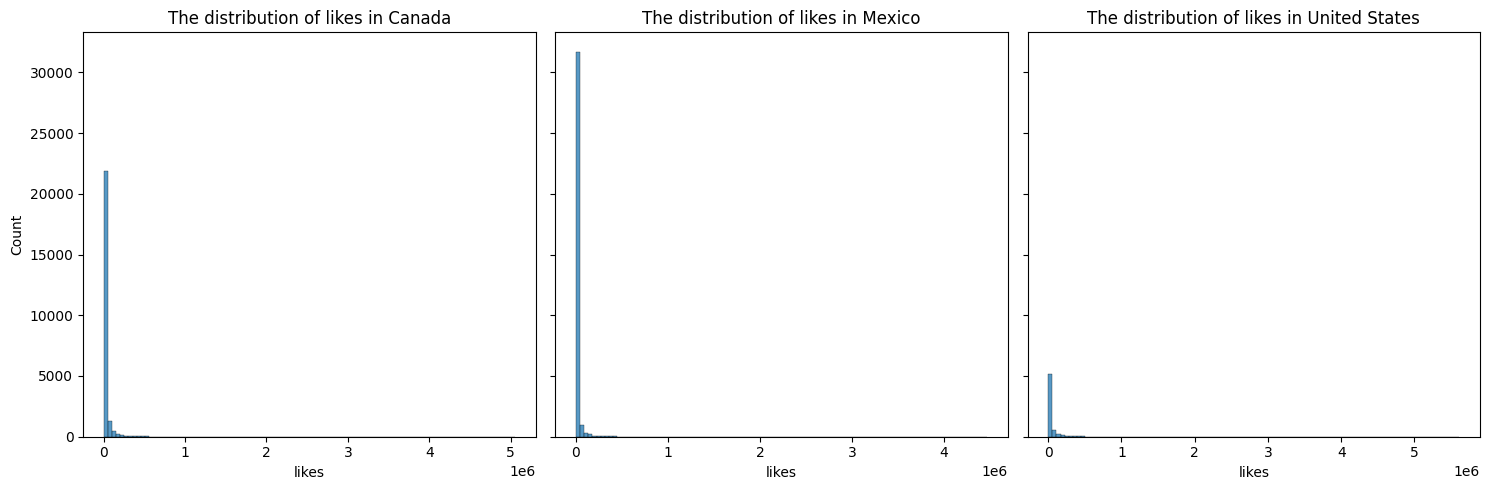

In [451]:
plt.figure(figsize=(12, 6))
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
bins = 100

# Plot for Canada
sns.histplot(
    data=ca_no_duplicate_keep_last_result, x="likes", bins=bins, ax=axes[0]
).set(title="The distribution of likes in Canada")

# Plot for Mexico
sns.histplot(
    data=mx_no_duplicate_keep_last_result, x="likes", bins=bins, ax=axes[1]
).set(title="The distribution of likes in Mexico")

# Plot for United States
sns.histplot(
    data=us_no_duplicate_keep_last_result, x="likes", bins=bins, ax=axes[2]
).set(title="The distribution of likes in United States")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [445]:
# Total likes in Canada dataset
ca_total_likes = ca_no_duplicate_keep_last_result["likes"].sum()

# Total likes in Mexico dataset
mx_total_likes = mx_no_duplicate_keep_last_result["likes"].sum()

# Total likes in United States dataset
us_total_likes = us_no_duplicate_keep_last_result["likes"].sum()

# Create a DataFrame with the total likes for each country
total_likes_df = pd.DataFrame(
    {
        "Country": ["Canada", "Mexico", "United States"],
        "Total likes": [ca_total_likes, mx_total_likes, us_total_likes],
    }
)

# Display the result
total_likes_df

,Country,Total likes
0,Canada,630739201
1,Mexico,410248874
2,United States,352957165


[Text(0.5, 1.0, "Total likes in each country's dataset")]

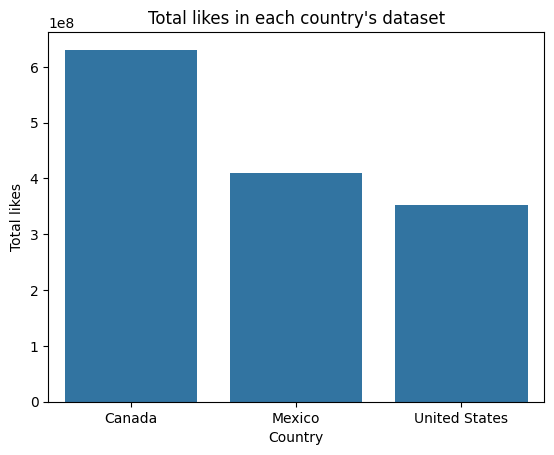

In [448]:
sns.barplot(data=total_likes_df, x="Country", y="Total likes").set(
    title="Total likes in each country's dataset"
)

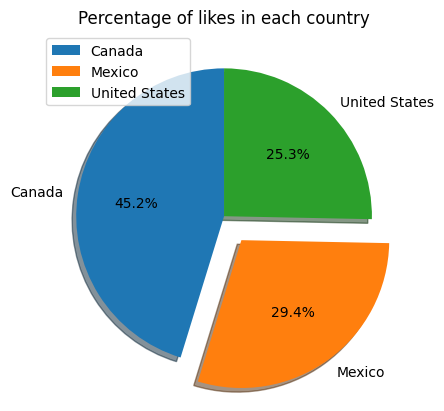

In [449]:
plt.pie(
    total_likes_df["Total likes"],
    labels=total_likes_df["Country"],
    autopct="%1.1f%%",
    explode=(0, 0.2, 0),
    shadow=True,
    startangle=90,
)

plt.title("Percentage of likes in each country")
plt.legend()
plt.show()

### ***Question 4: How the distribution of dislikes in each country?***

<Figure size 1200x600 with 0 Axes>

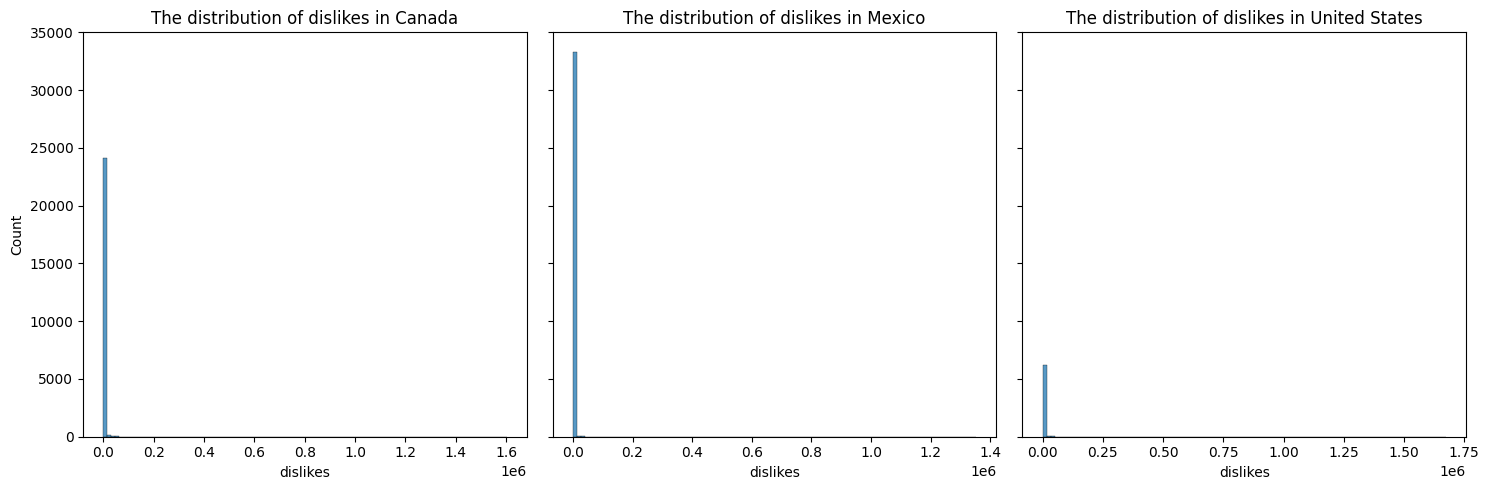

In [ ]:
plt.figure(figsize=(12, 6))
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
bins = 100

# Plot for Canada
sns.histplot(
    data=ca_no_duplicate_keep_last_result, x="dislikes", bins=bins, ax=axes[0]
).set(title="The distribution of dislikes in Canada")

# Plot for Mexico
sns.histplot(
    data=mx_no_duplicate_keep_last_result, x="dislikes", bins=bins, ax=axes[1]
).set(title="The distribution of dislikes in Mexico")

# Plot for United States
sns.histplot(
    data=us_no_duplicate_keep_last_result, x="dislikes", bins=bins, ax=axes[2]
).set(title="The distribution of dislikes in United States")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [454]:
# Total likes in Canada dataset
ca_total_dislikes = ca_no_duplicate_keep_last_result["dislikes"].sum()

# Total likes in Mexico dataset
mx_total_dislikes = mx_no_duplicate_keep_last_result["dislikes"].sum()

# Total likes in United States dataset
us_total_dislikes = us_no_duplicate_keep_last_result["dislikes"].sum()

# Create a DataFrame with the total likes for each country
total_dislikes_df = pd.DataFrame(
    {
        "Country": ["Canada", "Mexico", "United States"],
        "Total dislikes": [ca_total_dislikes, mx_total_dislikes, us_total_dislikes],
    }
)

# Display the result
total_dislikes_df

,Country,Total dislikes
0,Canada,31215329
1,Mexico,18294345
2,United States,19479487


[Text(0.5, 1.0, "Total dislikes in each country's dataset")]

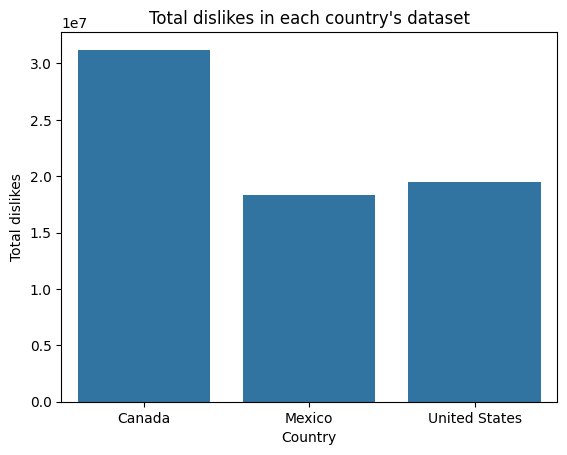

In [455]:
sns.barplot(data=total_dislikes_df, x="Country", y="Total dislikes").set(
    title="Total dislikes in each country's dataset"
)

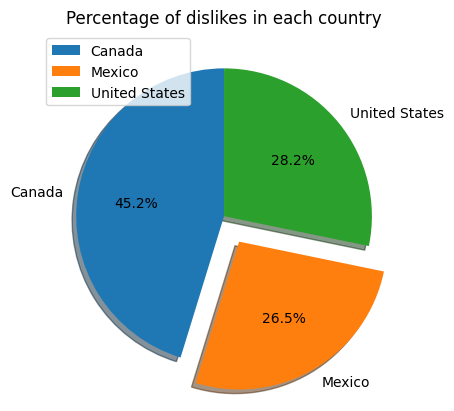

In [457]:
plt.pie(
    total_dislikes_df["Total dislikes"],
    labels=total_dislikes_df["Country"],
    autopct="%1.1f%%",
    explode=(0, 0.2, 0),
    shadow=True,
    startangle=90,
)

plt.title("Percentage of dislikes in each country")
plt.legend()
plt.show()

### ***Question 5: How the distribution of comments in each country?***

<Figure size 1200x600 with 0 Axes>

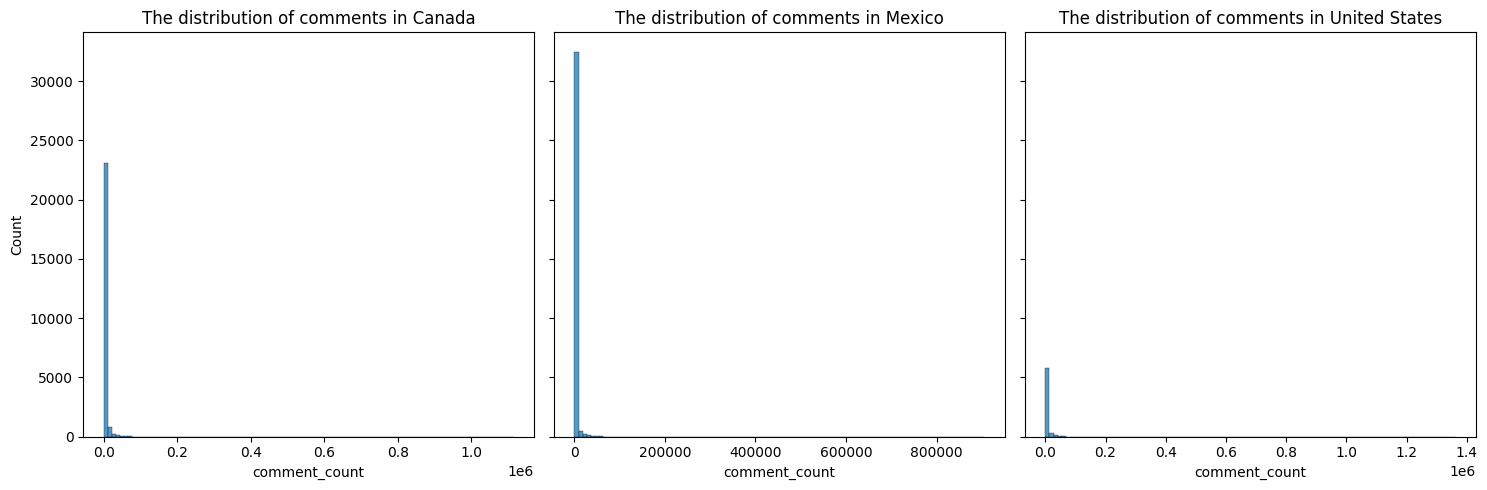

In [459]:
plt.figure(figsize=(12, 6))
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
bins = 100

# Plot for Canada
sns.histplot(
    data=ca_no_duplicate_keep_last_result, x="comment_count", bins=bins, ax=axes[0]
).set(title="The distribution of comments in Canada")

# Plot for Mexico
sns.histplot(
    data=mx_no_duplicate_keep_last_result, x="comment_count", bins=bins, ax=axes[1]
).set(title="The distribution of comments in Mexico")

# Plot for United States
sns.histplot(
    data=us_no_duplicate_keep_last_result, x="comment_count", bins=bins, ax=axes[2]
).set(title="The distribution of comments in United States")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [460]:
# Total likes in Canada dataset
ca_total_dislikes = ca_no_duplicate_keep_last_result["comment_count"].sum()

# Total likes in Mexico dataset
mx_total_dislikes = mx_no_duplicate_keep_last_result["comment_count"].sum()

# Total likes in United States dataset
us_total_dislikes = us_no_duplicate_keep_last_result["comment_count"].sum()

# Create a DataFrame with the total likes for each country
total_comments_df = pd.DataFrame(
    {
        "Country": ["Canada", "Mexico", "United States"],
        "Total comments": [ca_total_dislikes, mx_total_dislikes, us_total_dislikes],
    }
)

# Display the result
total_comments_df

,Country,Total comments
0,Canada,82422100
1,Mexico,52306249
2,United States,40968681


[Text(0.5, 1.0, "Total comments in each country's dataset")]

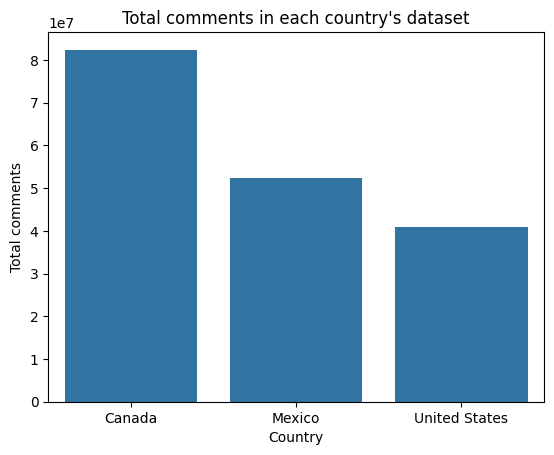

In [463]:
sns.barplot(data=total_comments_df, x="Country", y="Total comments").set(
    title="Total comments in each country's dataset"
)

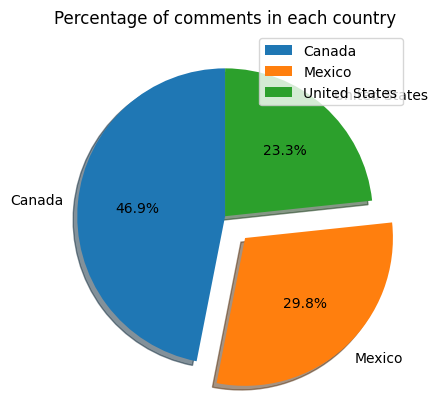

In [464]:
plt.pie(
    total_comments_df["Total comments"],
    labels=total_comments_df["Country"],
    autopct="%1.1f%%",
    explode=(0, 0.2, 0),
    shadow=True,
    startangle=90,
)

plt.title("Percentage of comments in each country")
plt.legend()
plt.show()

### Question 1: Who is the owner of the most trending videos on YouTube each month?

In [361]:
# Group by 'trending_date' and 'channel_title' and get the size (count) of each group
trending_owner_videos_each_month = (
    caVideo.groupby(["trending_date", "channel_title"]).size().reset_index(name="count")
)

# For each 'trending_date', find the row with the maximum count
most_trending_owner_per_month = trending_owner_videos_each_month.loc[
    trending_owner_videos_each_month.groupby("trending_date")["count"].idxmax()
]

# Print the result
print(most_trending_owner_per_month)

      trending_date                                      channel_title  count
0        2017-11-14                                          21 Savage      1
200      2017-11-15                                   20th Century Fox      1
400      2017-11-16                                   20th Century Fox      1
600      2017-11-17                                   20th Century Fox      1
800      2017-11-18                                   20th Century Fox      1
...             ...                                                ...    ...
39863    2018-06-10  - æ¬¢è¿è®¢é -æµæ±å«è§ãå¥è·å§ãå®...      1
40063    2018-06-11  - æ¬¢è¿è®¢é -æµæ±å«è§ãå¥è·å§ãå®...      1
40263    2018-06-12  - æ¬¢è¿è®¢é -æµæ±å«è§ãå¥è·å§ãå®...      1
40463    2018-06-13                                     2018 BTS FESTA      1
40663    2018-06-14                                     2018 BTS FESTA      1

[205 rows x 3 columns]


C:\Users\nguye\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 155 (\x9b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nguye\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nguye\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nguye\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nguye\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


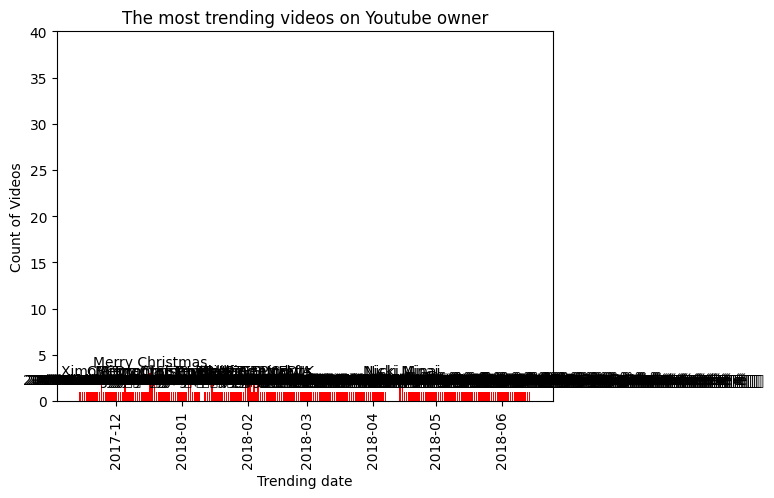

In [362]:
# Draw the bar chart
bars = plt.bar(
    most_trending_owner_per_month["trending_date"],
    most_trending_owner_per_month["count"],
    color="r",
)

# Set the y-axis limit
plt.ylim(0, 40)

# Add title and labels
plt.title("The most trending videos on Youtube owner")
plt.xlabel("Trending date")
plt.ylabel("Count of Videos")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

for i, bar in enumerate(bars):
    yval = bar.get_height()  # Get the height of the bar (the count)
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.5,
        most_trending_owner_per_month["channel_title"].iloc[i],
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

plt.show()

In the Canada country:
- In the last period of 2017, **Good Mythical Morning** and **Vikatan TV** respectively are the channel owning the most videos in the Youtube's trending in 11/2017 and 12/2017.
- The channel **The Young Turks** is the channel has the highest number of trending videos on Youtube in 01/2018.
- The channel **CNN** stands on top with the highest number of trending videos on Youtube from 02/2018 to 05/2018.
- The channel **Alhayah TV Network** has over 10 videos which enter the trending board on Youtube in 06/2018.

### Question 2: What type of videos do people watch the most?

In [363]:
# Filter all videos of the trending owner per month
all_video_of_trending_owner = caVideo.merge(
    most_trending_owner_per_month[["trending_date", "channel_title"]],
    on=["trending_date", "channel_title"],
)

type_of_trending_video_each_month = count_unique_records(
    all_video_of_trending_owner.groupby(["trending_date"]),
    ["trending_date", "category_name"],
)

type_of_trending_video_each_month

,"['trending_date', 'category_name']","count_['trending_date', 'category_name']"
0,"(2017-11-14 00:00:00, Music)",1
1,"(2017-11-15 00:00:00, Film & Animation)",1
2,"(2017-11-16 00:00:00, Film & Animation)",1
3,"(2017-11-17 00:00:00, Film & Animation)",1
4,"(2017-11-18 00:00:00, Film & Animation)",1
...,...,...
201,"(2018-06-10 00:00:00, Entertainment)",1
202,"(2018-06-11 00:00:00, Entertainment)",1
203,"(2018-06-12 00:00:00, Entertainment)",1
204,"(2018-06-13 00:00:00, People & Blogs)",1


In [364]:
result_dict = {}

# Iterate through each row to build the dictionary
for _, row in type_of_trending_video_each_month.iterrows():
    # Extract the date and category from the tuple
    trending_date, category_name = row["['trending_date', 'category_name']"]
    count = row["count_['trending_date', 'category_name']"]

    # Check if the date is already in the dictionary, if not, initialize it
    if trending_date not in result_dict:
        result_dict[trending_date] = {}

    # Add the category and count to the dictionary
    result_dict[trending_date][category_name] = count

# Print the final dictionary
result_dict = pd.DataFrame(result_dict)

print(result_dict)

                  2017-11-14  2017-11-15  2017-11-16  2017-11-17  2017-11-18  \
Music                    1.0         NaN         NaN         NaN         NaN   
Film & Animation         NaN         1.0         1.0         1.0         1.0   
Howto & Style            NaN         NaN         NaN         NaN         NaN   
Entertainment            NaN         NaN         NaN         NaN         NaN   
Sports                   NaN         NaN         NaN         NaN         NaN   
Education                NaN         NaN         NaN         NaN         NaN   
People & Blogs           NaN         NaN         NaN         NaN         NaN   
Pets & Animals           NaN         NaN         NaN         NaN         NaN   
News & Politics          NaN         NaN         NaN         NaN         NaN   
Comedy                   NaN         NaN         NaN         NaN         NaN   

                  2017-11-19  2017-11-20  2017-11-21  2017-11-22  2017-11-23  \
Music                    NaN         Na

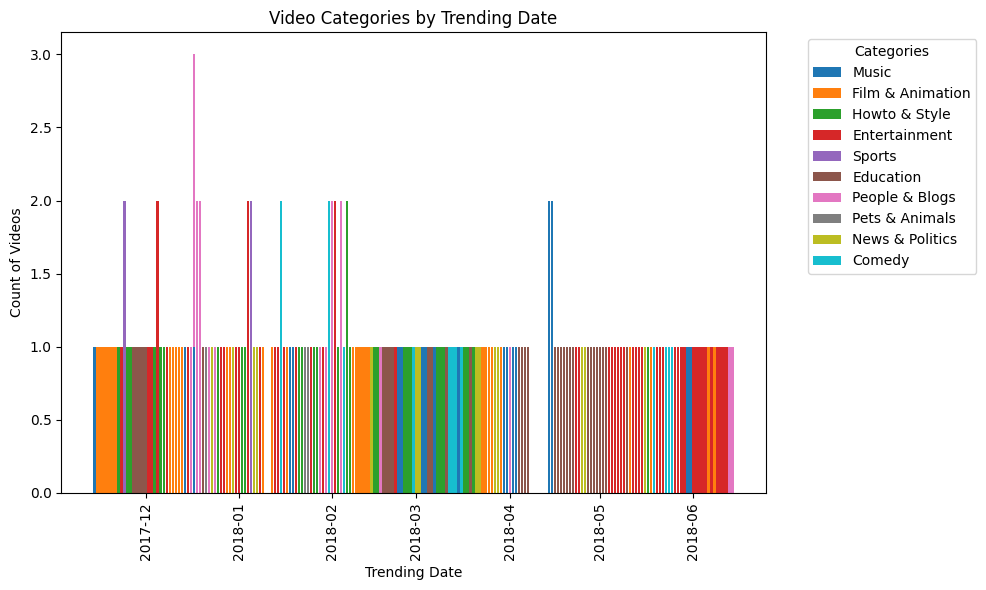

In [365]:
# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over categories to stack the bars
for category in result_dict.index:
    ax.bar(
        result_dict.columns,  # Dates (trending_date)
        result_dict.loc[category],  # Counts for the category
        label=category,  # Add category to legend
        bottom=result_dict.loc[:category].sum(axis=0)
        - result_dict.loc[category],  # Stack from previous totals
    )

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.title("Video Categories by Trending Date")
plt.xlabel("Trending Date")
plt.ylabel("Count of Videos")

# Add a legend to indicate the meaning of colors
plt.legend(title="Categories", bbox_to_anchor=(1.05, 1), loc="upper left")

# Display the plot
plt.tight_layout()
plt.show()

### News & Politics
- Most of the trending videos on YouTube during 01/2018 were from The Young Turks, while those from 02/2018 to 05/2018 were from CNN.
- These channels primarily focus on News & Politics, as indicated by the video topics.
- This suggests that people were particularly interested in News & Politics content from these channels during this period.

### Entertainment & Shows

- Trending videos in 11/2017 came from Good Mythical Morning, in 12/2017 from Vikatan TV, and in 06/2018 from Alhayah TV Network.
- These channels predominantly feature Entertainment & Shows content.